In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [12]:
# load the models
import gan_mnist
D = gan_mnist.D
G = gan_mnist.G

# load weights
D.load_state_dict(torch.load('weights/D--300.ckpt'))
G.load_state_dict(torch.load('weights/G--300.ckpt'))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

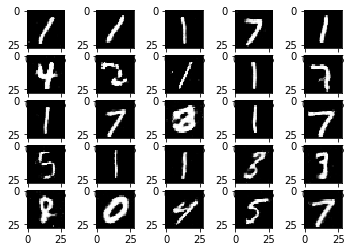

In [27]:
latent_size = 64
batch_size = 25

z = torch.randn(batch_size, latent_size).cuda()
z = Variable(z)
fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 28, 28)

R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], cmap='gray')
plt.show()

# run discriminator

In [29]:
outputs = D(fake_images)
print(outputs)

tensor([[0.1686],
        [0.3188],
        [0.2826],
        [0.1946],
        [0.2162],
        [0.6698],
        [0.5836],
        [0.2367],
        [0.2335],
        [0.0867],
        [0.0770],
        [0.2799],
        [0.0989],
        [0.1478],
        [0.1946],
        [0.1643],
        [0.0936],
        [0.1377],
        [0.2182],
        [0.3264],
        [0.2708],
        [0.1882],
        [0.4776],
        [0.4512],
        [0.4359]], device='cuda:0', grad_fn=<SigmoidBackward>)
